# Clients Segmentation for marketing strategie

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)  
BALANCE : Balance amount left in their account to make purchases   
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)  
PURCHASES : Amount of purchases made from account  
ONEOFFPURCHASES : Maximum purchase amount done in one-go  
INSTALLMENTSPURCHASES : Amount of purchase done in installment  
CASHADVANCE : Cash in advance given by the user  
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)  
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid  
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"  
PURCHASESTRX : Numbe of purchase transactions made  
CREDITLIMIT : Limit of Credit Card for user  
PAYMENTS : Amount of Payment done by user  
MINIMUM_PAYMENTS : Minimum amount of payments made by user  
PRCFULLPAYMENT : Percent of full payment paid by user  
TENURE : Tenure of credit card service for user  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from yellowbrick.cluster import silhouette_visualizer

In [11]:
# Importation des données
# Penser à changer le chemin sur votre machine
df = pd.read_csv("Data/CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Taille de la base de données
df.shape

(8950, 18)

In [5]:
# Summary statistics
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Types des variables et identification des valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
df.loc[df["CREDIT_LIMIT"].isnull(), :]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [149]:
df.loc[df["MINIMUM_PAYMENTS"].isnull(), :]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


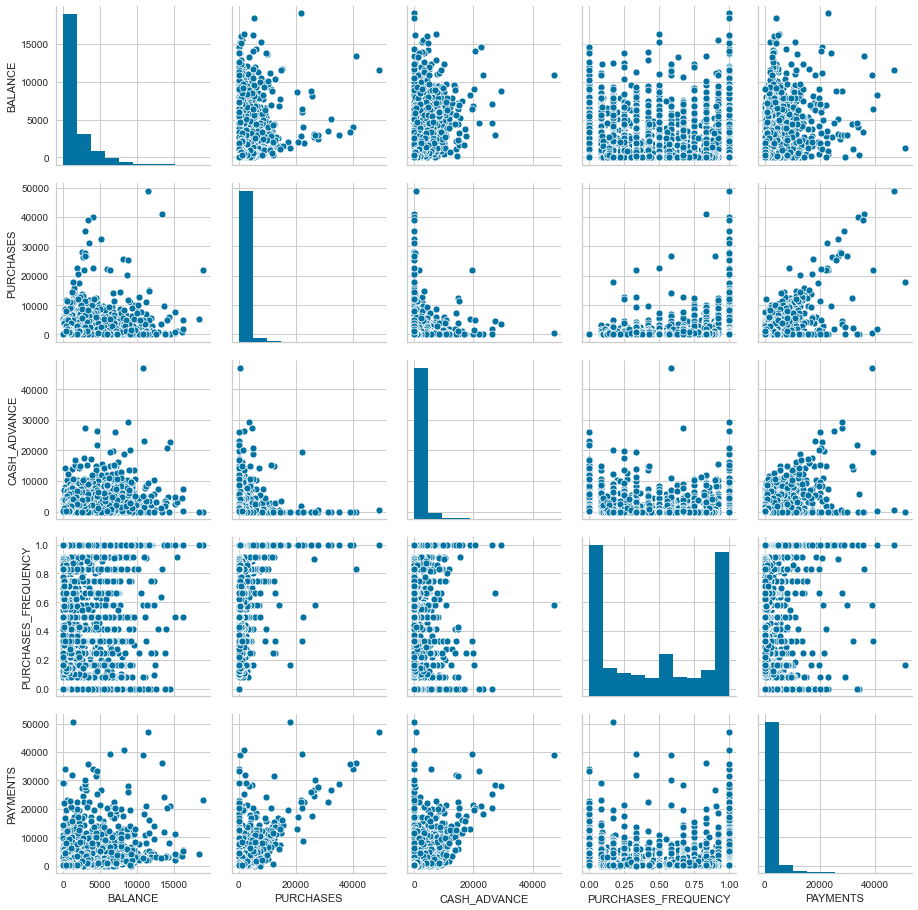

In [148]:
# Visualisation graphique de queleques variables
sn.pairplot(df[["BALANCE", "PURCHASES", "CASH_ADVANCE","PURCHASES_FREQUENCY", "PAYMENTS"]])

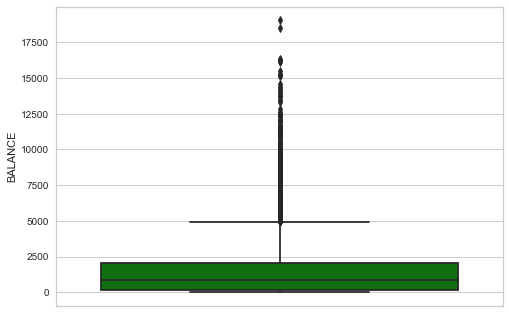

In [152]:
sn.boxplot( y="BALANCE", data=df, color = "green")

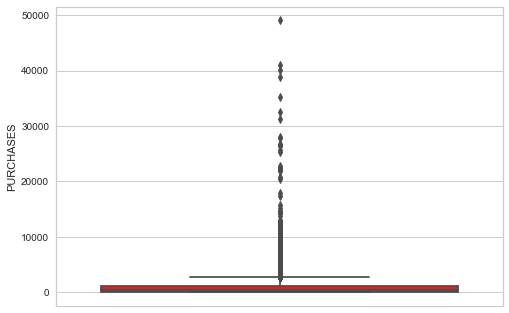

In [153]:
sn.boxplot( y="PURCHASES", data=df, color = "red")

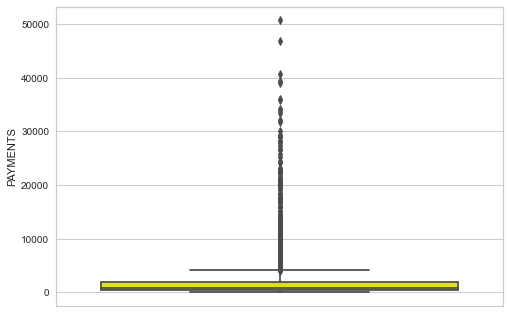

In [155]:
sn.boxplot( y="PAYMENTS", data=df, color = "yellow")

In [11]:
# Centrer et réduire les données
dff = df.iloc[:,1:18]
scaler = StandardScaler().fit(dff)
scaler
a = scaler.transform(dff)
dg = pd.DataFrame(a)
dg.columns = dff.columns
dg["CUST_ID"] = df["CUST_ID"]
dg.dropna(subset=['MINIMUM_PAYMENTS','CREDIT_LIMIT'], axis=0, inplace = True)
dg.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CUST_ID
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.36068,C10001
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.36068,C10002
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.36068,C10003
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.36068,C10005
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740516,-0.115060,0.650438,-0.525551,0.36068,C10006


In [12]:
dg.shape

(8636, 18)

In [14]:
# Mesure de corrélation entre variable
dg.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


### **Idée :** 
On va construire une ACP pour réduire le nombre de variable et pouvoir visualiser un clustering sur des graphes

In [15]:
# ACP sur les variables
pca = PCA(n_components=0.80, random_state=42)
X_reduced= pca.fit_transform(dg.iloc[:,0:17])
X_reduced.shape

(8636, 7)

# Algorithmes de Clustering (K-Means, DBSCAN, CAH)

# K-Means

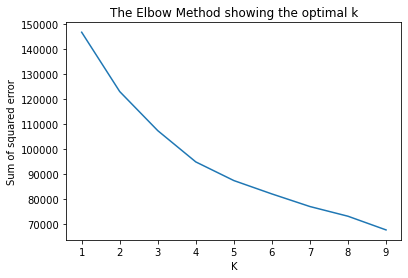

In [16]:
# Affichage de l'erreur quadratique en fonction du nombre de classeurs pour choisir la classe adequate
k_rng = range(1,10)
s=[]
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(dg.iloc[:,0:17])
    s.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method showing the optimal k')
plt.plot(k_rng,s)

In [109]:
# Kmeans algorithm
km = KMeans(n_clusters = 4)
y_predict = km.fit_predict(X_reduced)
y_predict

array([0, 3, 2, ..., 2, 0, 0])

In [110]:
dg['cluster_k_means'] = y_predict
dg.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CUST_ID,cluster_k_means,cluster_CAH
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.36068,C10001,0,4
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.36068,C10002,3,3
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.36068,C10003,2,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.36068,C10005,0,4
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740516,-0.115060,0.650438,-0.525551,0.36068,C10006,2,4


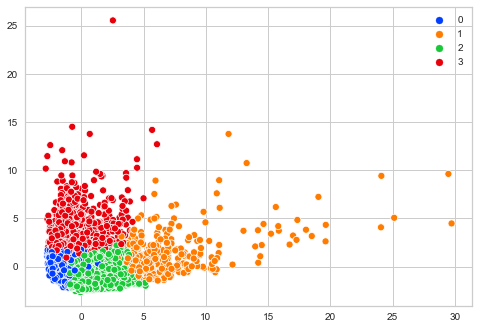

In [111]:
sn.scatterplot(x=X_reduced[:,0] , y=X_reduced[:,1] , 
               hue=y_predict, palette="bright", s=50)

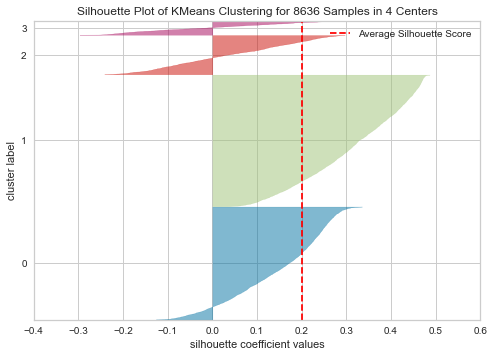

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AC8EB3040>,
                     colors='yellowbrick', model=None)

In [108]:
# Diagramme de silhouette pour mesurer à quel points nos individus sont bien classés
silhouette_visualizer(KMeans(4, random_state=42),dg.iloc[:,0:17] , colors='yellowbrick')

# DBSCAN

In [102]:
db = DBSCAN(eps=2, min_samples=5, metric='euclidean',
            algorithm='auto', p=None, n_jobs=None)
cluster = db.fit(X_reduced)
labels = cluster.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_

3

In [104]:
n_noise_

220

In [105]:
y_pred = db.fit_predict(X_reduced)

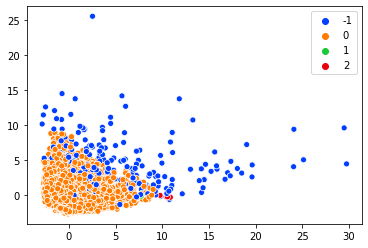

In [106]:
sn.scatterplot(x=X_reduced[:,0] , y=X_reduced[:,1],hue=y_pred, palette="bright", cmap='Paired')

# CAH

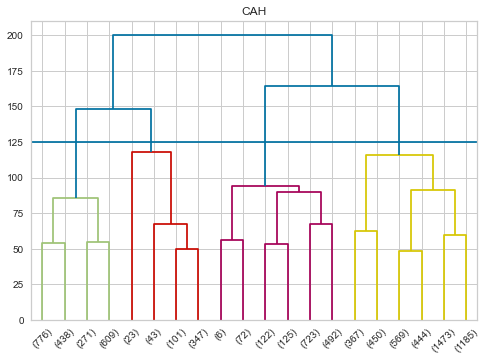

In [113]:
#générer la matrice des liens
Z = linkage(dg.iloc[:,0:17], "ward",metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z, orientation='top',  truncate_mode = 'lastp', p=20, leaf_rotation=45.,
           leaf_font_size = 10.)

# - orientation: pour orienter le dendogram, vous pouvez essayer 'left' pour mieux comprendre
# - trancate_mode: La matrice des liens est très large donc on aura une mauvaise visualisation si on 
# trace le dendogramme en entier, on arrete au dernier non-singleton p formé lors de linkage 
# - p: le p paramètre du trancated_mode
# - leaf_rotation: pour spécifier l'angle de rotation du label de la feuille


plt.axhline(y=125) # ça aide à choisir la coupurev 
plt.title('CAH')
plt.show()


In [58]:
#découpage à la hauteur t = 125 ==> identifiants de 4 groupes obtenus
groupes_cah = fcluster(Z,t=125,criterion='distance')
print(groupes_cah)
#index triés des groupes
dg['cluster_CAH'] = groupes_cah
dg.head()

[4 3 1 ... 4 4 4]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CUST_ID,cluster_k_means,cluster_CAH
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.36068,C10001,2,4
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.36068,C10002,0,3
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.36068,C10003,1,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.36068,C10005,2,4
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740516,-0.115060,0.650438,-0.525551,0.36068,C10006,1,4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


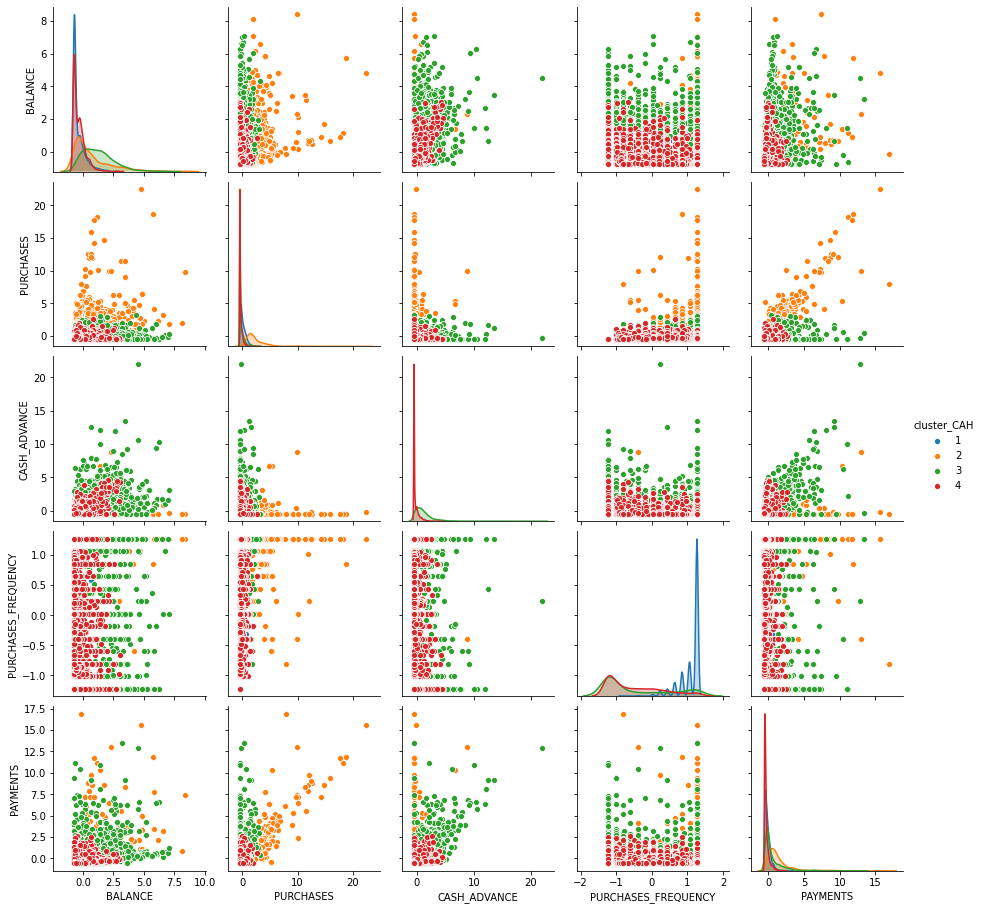

In [68]:
sn.pairplot(dg[["BALANCE", "PURCHASES", "CASH_ADVANCE","PURCHASES_FREQUENCY", "PAYMENTS",
                "cluster_CAH"]], hue="cluster_CAH")

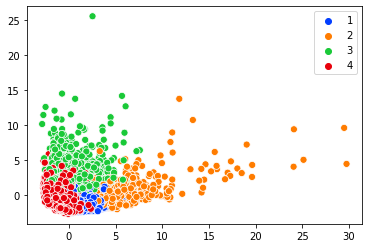

In [65]:
sn.scatterplot(x=X_reduced[:,0] , y=X_reduced[:,1] , 
               hue=groupes_cah, palette="bright", s=50)

In [77]:
s=[]
for i in range (1,5):
    s.append(dg.loc[dg["cluster_CAH"]==i,:])
    print(s[i-1].shape)

(2094, 20)
(514, 20)
(1540, 20)
(4488, 20)


# Analyse Descriptive des classeurs

In [78]:
dff = df.dropna(subset=['MINIMUM_PAYMENTS','CREDIT_LIMIT'], axis=0)
dff["cluster_k_means"] = dg["cluster_k_means"]

<ipython-input-78-fed1985df5e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["cluster_k_means"] = dg["cluster_k_means"]


In [117]:
# Shape of clusters
l=[]
for i in range (4):
    l.append(dff.loc[dff["cluster_k_means"]==i,:])
    print(l[i].shape)

(1139, 19)
(3280, 19)
(3824, 19)
(393, 19)


In [118]:
# Summary Statistics of the first cluster
l[0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_k_means
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.0
mean,4667.352164,0.967593,507.439833,319.935847,187.593248,4631.903121,0.292508,0.140467,0.189565,0.489021,14.587357,7.796313,7681.786256,3590.420221,2026.269414,0.036073,11.377524,0.0
std,2782.433564,0.092824,869.575127,666.575193,424.472838,3661.616419,0.356824,0.230129,0.314808,0.229024,12.499774,14.235304,3741.768474,4273.510205,3898.635215,0.105392,1.481480,0.0
min,78.114579,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,46.969049,16.950090,0.000000,6.000000,0.0
25%,2526.512820,1.000000,0.000000,0.000000,0.000000,2437.275884,0.000000,0.000000,0.000000,0.333333,7.000000,0.000000,5000.000000,1259.862938,755.885249,0.000000,12.000000,0.0
50%,4373.439331,1.000000,99.000000,0.000000,0.000000,3767.104707,0.083333,0.000000,0.000000,0.500000,12.000000,1.000000,7500.000000,2025.270282,1347.127384,0.000000,12.000000,0.0
75%,6336.074389,1.000000,651.995000,328.460000,158.510000,5714.812348,0.583333,0.166667,0.333333,0.666667,18.000000,10.000000,10000.000000,4181.668629,2075.337241,0.000000,12.000000,0.0
max,16304.889250,1.000000,7194.530000,6678.260000,4059.930000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,142.000000,21500.000000,39048.597620,61031.618600,1.000000,12.000000,0.0


In [119]:
l[1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_k_means
count,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.0
mean,905.712177,0.942643,1263.946088,607.639268,656.497213,217.545169,0.887943,0.300992,0.715527,0.043678,0.812500,22.478049,4258.222638,1370.066038,647.830814,0.277045,11.597561,1.0
std,1228.494138,0.136916,1058.785734,885.637121,635.562373,617.673801,0.148213,0.354262,0.311258,0.101039,2.066424,16.332158,3289.468929,1295.038150,1802.468195,0.359766,1.242824,0.0
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,16.385421,0.019163,0.000000,6.000000,1.0
25%,84.058859,1.000000,449.935000,0.000000,229.480000,0.000000,0.833333,0.000000,0.567461,0.000000,0.000000,12.000000,1500.000000,474.409016,159.540378,0.000000,12.000000,1.0
50%,341.344690,1.000000,922.290000,179.180000,459.985000,0.000000,1.000000,0.166667,0.833333,0.000000,0.000000,17.000000,3000.000000,973.880520,194.286882,0.083333,12.000000,1.0
75%,1266.424118,1.000000,1815.737500,925.067500,890.222500,0.000000,1.000000,0.583333,1.000000,0.000000,0.000000,28.000000,6000.000000,1828.328938,559.224968,0.545455,12.000000,1.0
max,9502.256762,1.000000,6520.000000,6520.000000,4538.840000,7894.578816,1.000000,1.000000,1.000000,0.750000,23.000000,186.000000,25000.000000,12020.180090,38512.124770,1.000000,12.000000,1.0


In [120]:
l[2].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_k_means
count,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.0
mean,1081.716323,0.823157,276.254668,214.437406,62.173033,611.158828,0.174338,0.089057,0.081909,0.120341,2.225941,3.042887,3266.802650,1018.875335,587.584907,0.081319,11.484310,2.0
std,1127.949472,0.262453,474.356642,452.413115,159.116445,926.014294,0.191645,0.139506,0.149600,0.141575,3.043446,4.196924,2630.522604,1512.119988,1426.262869,0.209051,1.360581,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.049513,0.037744,0.000000,6.000000,2.0
25%,126.810004,0.636364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,302.175365,155.232136,0.000000,12.000000,2.0
50%,859.673463,1.000000,81.110000,0.000000,0.000000,138.585721,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2500.000000,568.393357,289.563359,0.000000,12.000000,2.0
75%,1587.891958,1.000000,349.060000,221.270000,52.545000,953.957210,0.333333,0.111111,0.083333,0.166667,3.000000,5.000000,4000.000000,1126.070444,581.750409,0.000000,12.000000,2.0
max,8115.039014,1.000000,4900.000000,4900.000000,3000.000000,6466.733810,0.857143,0.818182,0.714286,0.857143,23.000000,48.000000,23000.000000,28988.973880,28483.254830,1.000000,12.000000,2.0


In [121]:
l[3].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_k_means
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.0
mean,3574.668962,0.986807,7825.781043,5207.268321,2620.039440,659.904968,0.944448,0.739008,0.786429,0.071012,2.104326,90.541985,9781.170483,7458.698082,1995.946239,0.292584,11.949109,3.0
std,3365.449349,0.059603,6049.071663,5448.408537,2767.259363,1903.239126,0.136874,0.289270,0.312361,0.154410,6.186869,56.931564,4860.413988,6946.571445,5148.945527,0.393909,0.460097,0.0
min,137.636267,0.272727,900.870000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,1000.000000,92.865469,108.937025,0.000000,6.000000,3.0
25%,889.090252,1.000000,4717.770000,2290.360000,832.740000,0.000000,1.000000,0.583333,0.666667,0.000000,0.000000,53.000000,6000.000000,3632.719723,247.085679,0.000000,12.000000,3.0
50%,2494.868559,1.000000,5967.420000,3744.410000,1852.930000,0.000000,1.000000,0.833333,1.000000,0.000000,0.000000,80.000000,9000.000000,5575.894258,722.986478,0.000000,12.000000,3.0
75%,5193.415429,1.000000,8631.000000,6367.490000,3231.950000,271.370767,1.000000,1.000000,1.000000,0.083333,1.000000,111.000000,12500.000000,8438.775135,1955.832192,0.727273,12.000000,3.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.0


### Répartition des individus par variable et par classeur

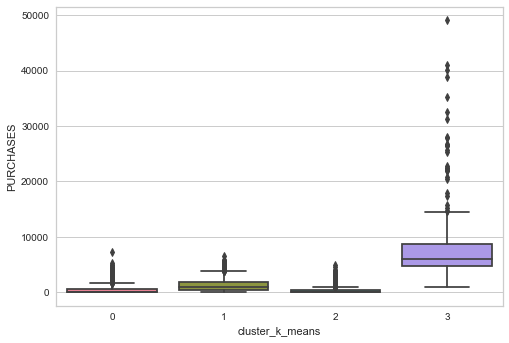

In [134]:
sn.boxplot(x="cluster_k_means", y="PURCHASES", data=dff, palette="husl")

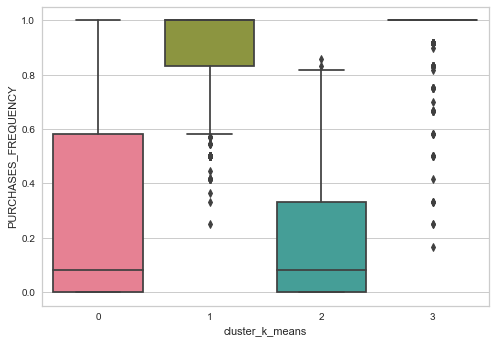

In [135]:
sn.boxplot(x="cluster_k_means", y="PURCHASES_FREQUENCY", data=dff, palette="husl")

### Résultat:
En analysant les descriptions statistiques ainsi que les deux graphiques ci-dessous on peut conclure que le classeur 3 se caractérise par un fort pouvoir d'achats et les clients de ce classeur effectuent des achats d'une fréquence élevé. A l'inverse du classeur 0 et 2 qui caractérisent des clients à faible pouvoir d'achat  
  
Par contre on remarque que les clients du classeur 1, même si leurs montants d'achats sont faibles, leurs fréquences d'achats est très élevé. On peut les caractériser par des clients qui achete fréquement mais que des achats à petits prix

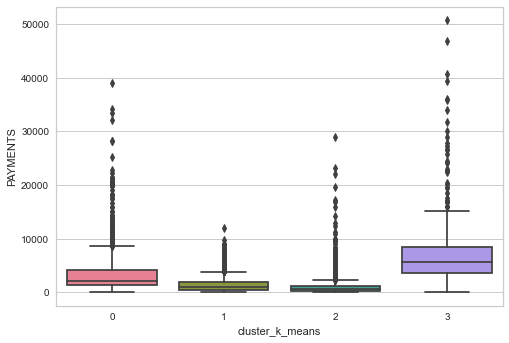

In [131]:
sn.boxplot(x="cluster_k_means", y="PAYMENTS", data=dff,  palette="husl")

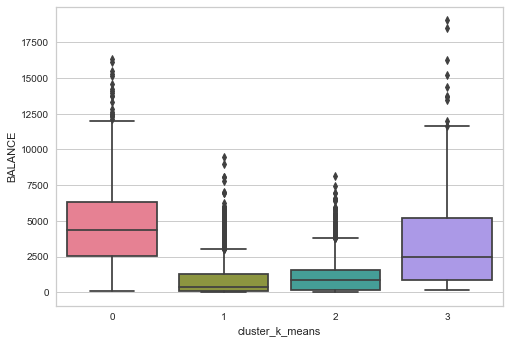

### Résultat:
En analysant cette fois la variable BALANCE qui indique le montant moyen que les clients laissent sur leurs comptes pour effectuer des achats, On remarque cette fois une différence entre le classeur 0 et 2. Même s'ils ont tout les deux des faibles pouvoirs d'achats, La balance du montant du compte des clients du classeur 0 est élévé quand même.   
  
On peut caractériser le classeur 0 par des clients qui laisse de l'argent sur leurs compte mais sans les utiliser beaucoup dans des achats.  
  
La variable PAYMENTS montre aussi que les achats par les clients du classeur 0 sont limités

# Conclusion

- **Classeur 0:** Des clients qui laissents de l'argent sur leurs comptes mais n'effectuent pas beaucoup d'achats    
  
- **Classeur 1:** Des clients qui ne laissent pas beaucoup d'argent sur leurs comptes et qui ont un faible pouvoir d'achat. Par contre ils effectuents beaucoup d'achats à petits prix

- **Classeur 2:** Des clients avec un faible pouvoir d'achat, qui ne laissent pas de l'argent sur leurs compte et qui n'effectuent pas d'achats

- **Classeur 3:** Des clients avec un grand pouvoir d'achat, qui achetent souvent, qui dépensent beaucoup d'argent sur leurs achats avec un compte bien alimenté